In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime,time

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("My Uber Drives - 2016.csv",encoding = 'latin1')
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.columns = df.columns.str.replace("*","")

In [5]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [6]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [9]:
df.shape

(1156, 7)

In [10]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [11]:
df.isnull().any()

START_DATE    False
END_DATE       True
CATEGORY       True
START          True
STOP           True
MILES         False
PURPOSE        True
dtype: bool

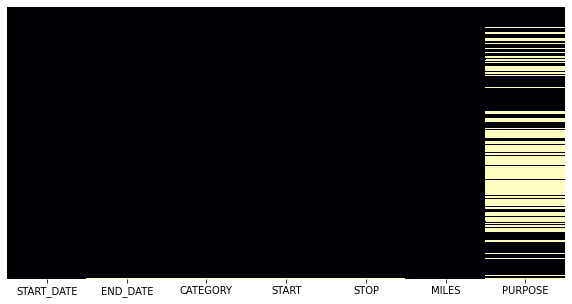

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cmap = 'magma',yticklabels=False,cbar=False)
plt.show()

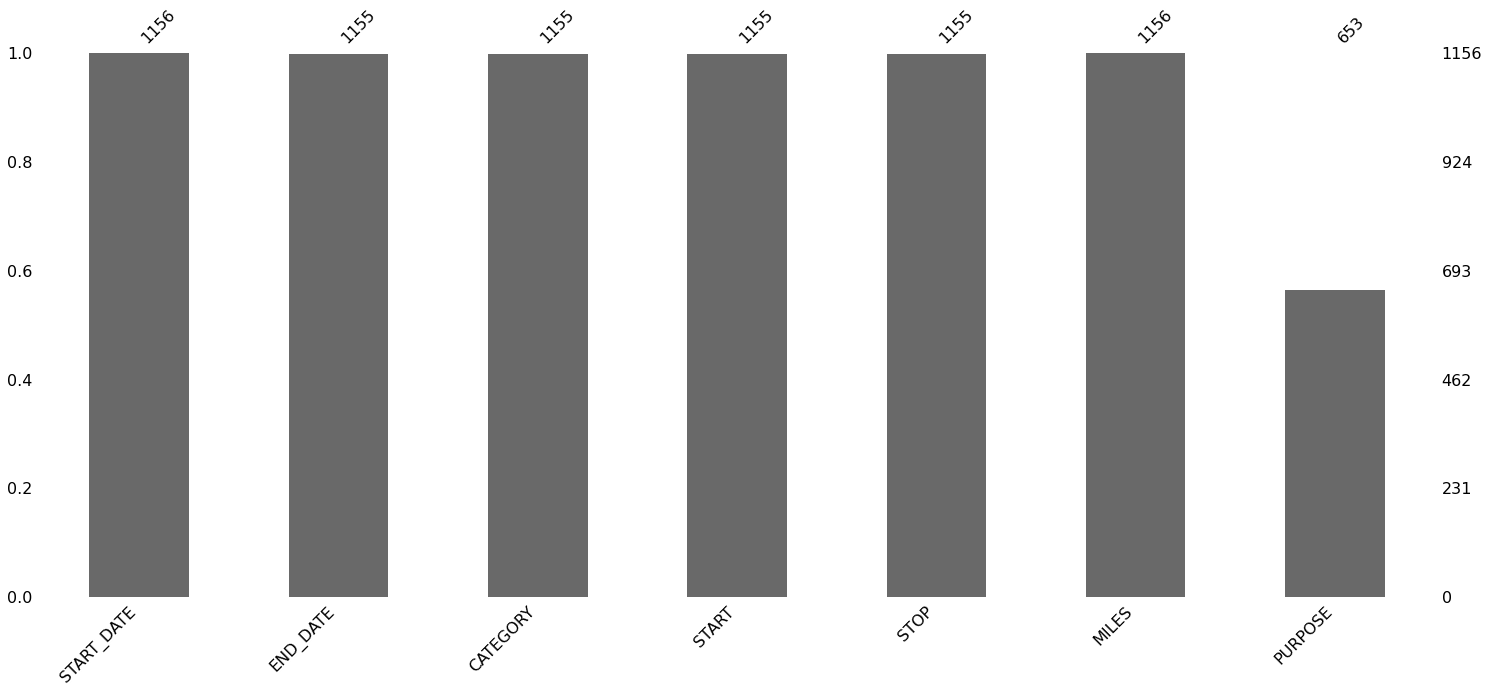

In [26]:
import missingno as msng
msng.bar(df)
plt.show()

In [27]:
null_columns = df.columns[df.isnull().any()]
null_columns

Index(['END_DATE', 'CATEGORY', 'START', 'STOP', 'PURPOSE'], dtype='object')

In [28]:
df[null_columns].isnull().sum()

END_DATE      1
CATEGORY      1
START         1
STOP          1
PURPOSE     503
dtype: int64

In [29]:
df.drop(index = 1155,axis = 0,inplace = True)

In [30]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [31]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [32]:
df["PURPOSE"].isnull().sum()/len(df)

0.43463203463203465

In [33]:
df["PURPOSE"].fillna(method="ffill",inplace=True)

In [34]:
df.isna().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [35]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'],errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'],errors='coerce')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


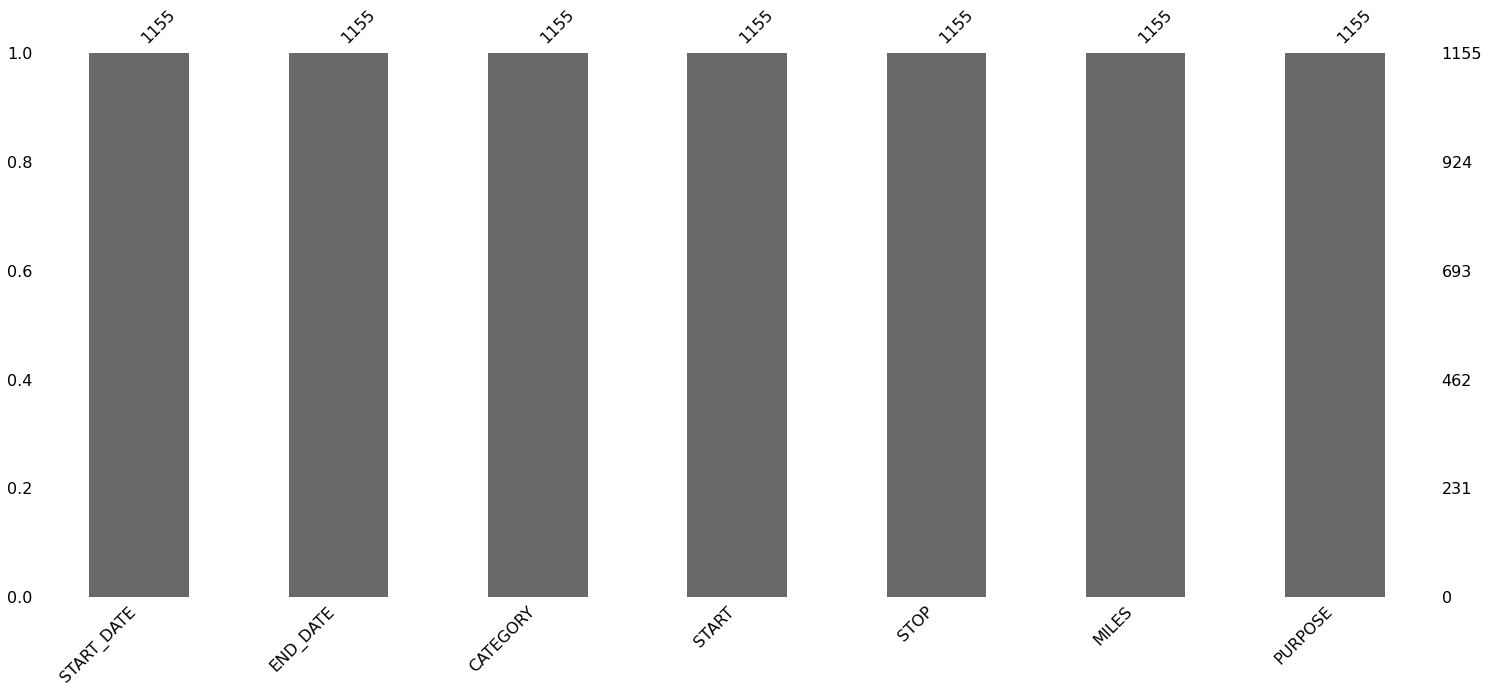

In [37]:
msng.bar(df)
plt.show()

In [38]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [39]:
df['CATEGORY'].unique()

array(['Business', 'Personal'], dtype=object)

col_0,Count of travels as per category
CATEGORY,
Business,1078
Personal,77


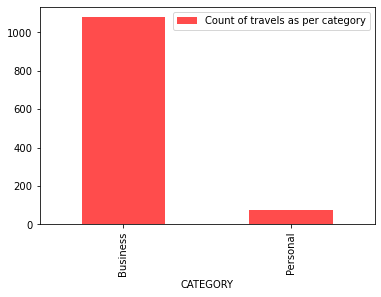

In [40]:
category = pd.crosstab(index = df["CATEGORY"],columns = "Count of travels as per category")
category.plot(kind='bar',color='r',alpha=0.7)
plt.legend()
category

In [41]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [51]:
start_point = df.START.value_counts()
start_point

Cary                          201
Unknown Location              148
Morrisville                    85
Whitebridge                    68
Islamabad                      57
                             ... 
Seattle                         1
Hayesville                      1
College Avenue                  1
Townes at Everett Crossing      1
North Berkeley Hills            1
Name: START, Length: 177, dtype: int64

In [53]:
print(start_point[start_point > 10].sum())

784


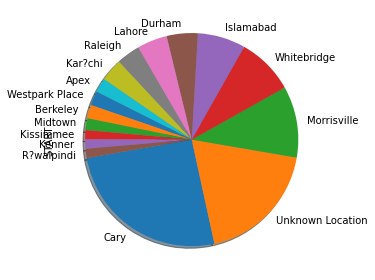

In [47]:
start_point[start_point > 10].plot(kind = "pie", shadow=True, startangle=190)
plt.tight_layout()
plt.show()

In [49]:
start_point = df.START.value_counts()
start_point
start_point[start_point <=  10].sum()

371

In [56]:
stop_point = df.STOP.value_counts()
stop_point
stop_point[stop_point >=  10]

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Lahore               36
Durham               36
Raleigh              29
Kar?chi              26
Apex                 17
Berkeley             16
Westpark Place       16
R?walpindi           13
Kissimmee            12
Midtown              11
Edgehill Farms       10
Kenner               10
New Orleans          10
Name: STOP, dtype: int64

In [57]:
stop_point[stop_point >=  10].sum()

801

In [58]:
stop_point = df.STOP.value_counts()
stop_point
stop_point[stop_point <=  10]

Edgehill Farms           10
Kenner                   10
New Orleans              10
Central                   9
Emeryville                9
                         ..
St Thomas                 1
Lower Garden District     1
Umstead                   1
Red River District        1
El Cerrito                1
Name: STOP, Length: 173, dtype: int64

In [59]:
stop_point[stop_point <=  10].sum()

384

In [61]:
miles = df.MILES.value_counts()
miles

9.9      28
3.1      26
3.0      19
2.1      19
2.5      19
         ..
18.5      1
63.7      1
43.7      1
310.3     1
15.0      1
Name: MILES, Length: 256, dtype: int64

In [63]:
miles[miles>=10].sum()

509

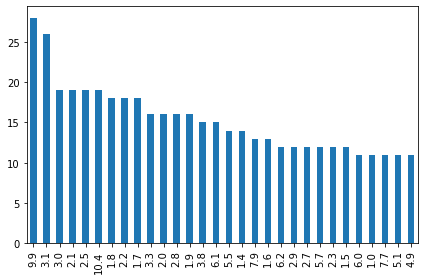

In [64]:
miles[miles> 10].plot(kind = "bar")
plt.tight_layout()
plt.show()

col_0,Count of Miles
MILES,
False,840
True,315


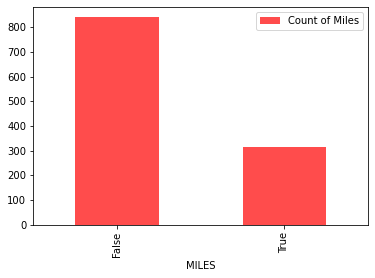

In [68]:
miles =pd.crosstab(index=df["MILES"]>10,columns='Count of Miles')

miles.plot(kind='bar',color='r',alpha=0.7)
plt.legend()
miles

In [70]:
print(df.PURPOSE.value_counts())

Meeting            308
Meal/Entertain     245
Temporary Site     196
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Commute              1
Charity ($)          1
Name: PURPOSE, dtype: int64


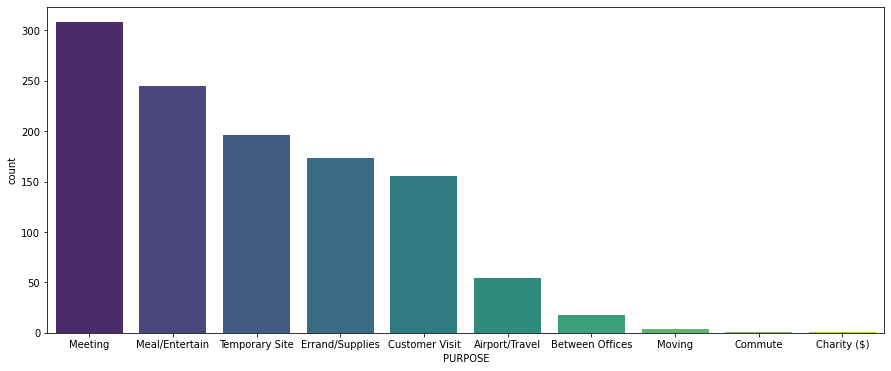

In [71]:
plt.figure(figsize=(15,6))
sns.countplot(df['PURPOSE'], order=df['PURPOSE'].value_counts().index, palette='viridis')
plt.show()

In [72]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [76]:
df['MINUTES'] = df.END_DATE - df.START_DATE
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00


In [77]:
df['MINUTES'] = df['MINUTES'].dt.total_seconds() /60
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


In [84]:
pd.DataFrame({'MEAN': df.groupby(['PURPOSE'])['MILES'].mean().round(1), 
              'MIN' : df.groupby(['PURPOSE'])['MILES'].min(), 
              'MAX' : df.groupby(["PURPOSE"])['MILES'].max()}).reset_index()

,PURPOSE,MEAN,MIN,MAX
0,Airport/Travel,15.0,0.9,156.9
1,Between Offices,10.9,1.9,39.2
2,Charity ($),15.1,15.1,15.1
3,Commute,180.2,180.2,180.2
4,Customer Visit,16.1,0.6,310.3
5,Errand/Supplies,5.9,0.5,195.3
6,Meal/Entertain,5.8,0.6,36.5
7,Meeting,12.7,0.7,201.0
8,Moving,4.6,3.3,6.1
9,Temporary Site,11.0,0.7,195.6


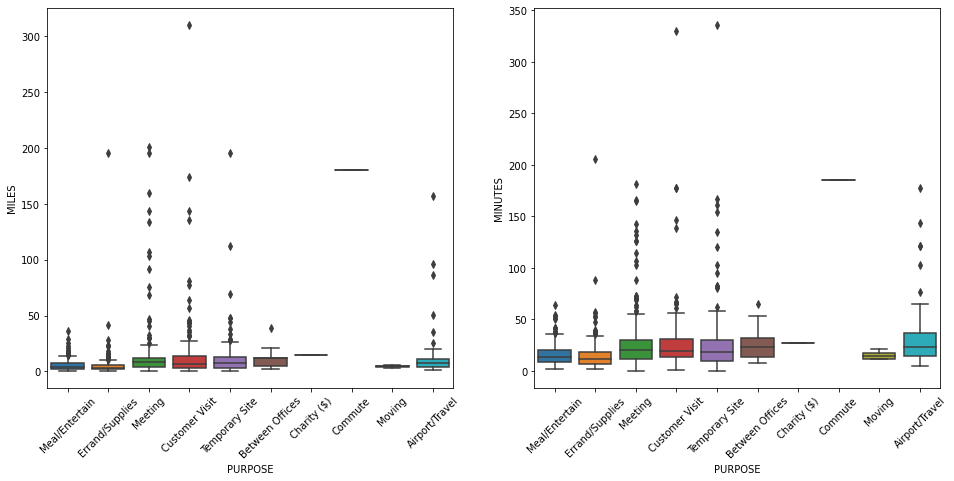

In [86]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MILES)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MINUTES)
plt.xticks(rotation=45);

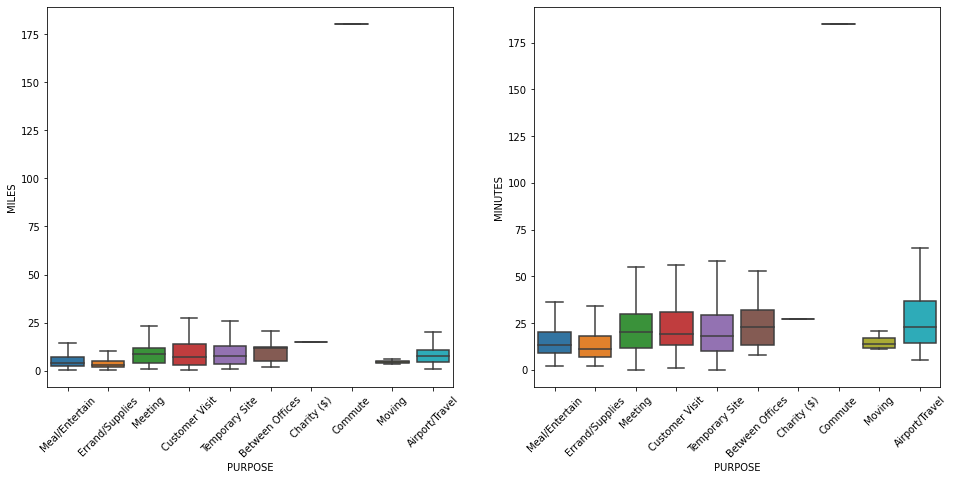

In [87]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MILES,showfliers=False)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MINUTES,showfliers=False)
plt.xticks(rotation=45);

In [92]:
df[df.START == df.STOP].value_counts().sum()

288

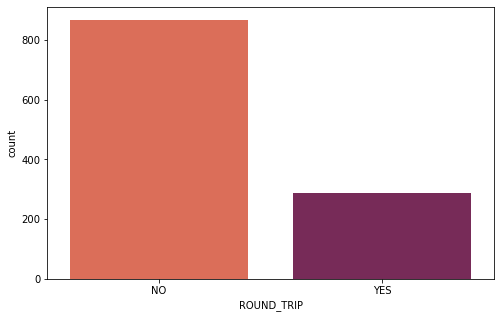

In [94]:
plt.figure(figsize=(8,5))
def round(x):
    if x['START'] == x['STOP']:
        return 'YES'
    else:
        return 'NO'
    
df['ROUND_TRIP'] = df.apply(round, axis=1)

sns.countplot(df['ROUND_TRIP'], order=df['ROUND_TRIP'].value_counts().index, palette='rocket_r')
plt.show()

In [96]:
df['MONTH'] = pd.DatetimeIndex(df['START_DATE']).month
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,ROUND_TRIP,MONTH
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,YES,12
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,NO,12
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,YES,12
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,NO,12
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,103.0,NO,12


In [97]:
dic = {1:'Jan', 2: 'Feb', 3: 'Mar', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep',
      10: 'Oct', 11: 'Nov', 12: 'Dec' }

df['MONTH'] = df['MONTH'].map(dic)

In [98]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,ROUND_TRIP,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,YES,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,YES,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,YES,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,YES,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,NO,Jan


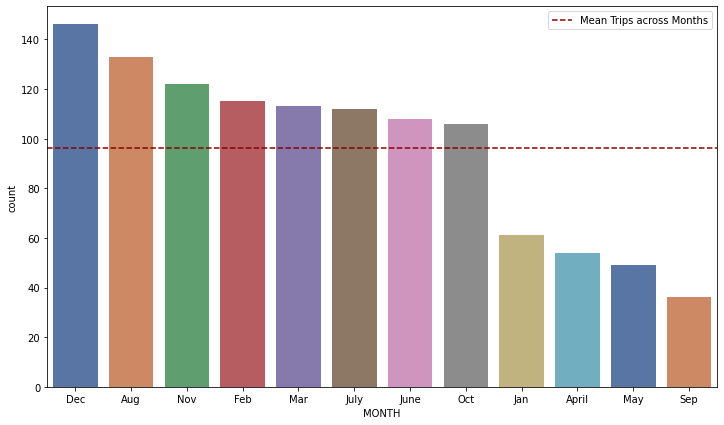

In [99]:
plt.figure(figsize=(12,7))
sns.countplot(df['MONTH'], order=df['MONTH'].value_counts().index, palette='deep')
plt.axhline(df['MONTH'].value_counts().mean(),linestyle='--', color = 'darkred', label='Mean Trips across Months')
plt.legend()
plt.show()

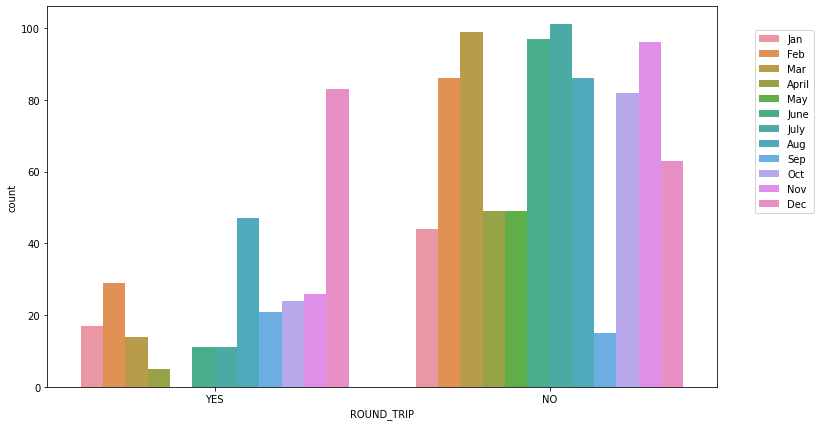

In [101]:
plt.figure(figsize=(12,7))
sns.countplot(df['ROUND_TRIP'],hue=df['MONTH'])
plt.legend(bbox_to_anchor=(1.05, 0.95), loc=2)
plt.show()

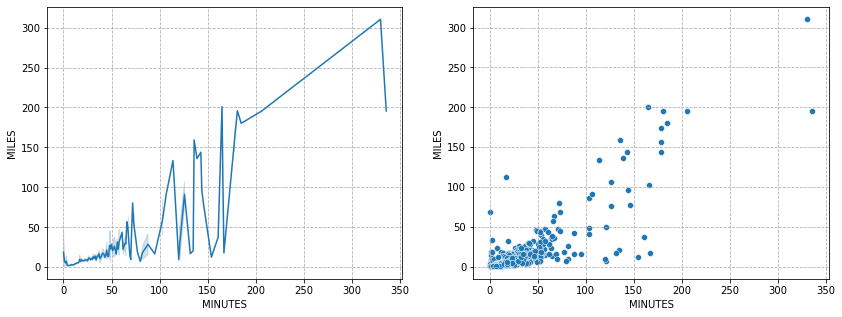

In [102]:
plt.figure(figsize = (14,5))
plt.subplot(1,2,1)
sns.lineplot(data=df, x=df.MINUTES, y=df.MILES)
plt.grid(True, linestyle = "--")
plt.subplot(1,2,2)
sns.scatterplot(data=df, x=df.MINUTES, y=df.MILES)
plt.grid(True, linestyle = "--")

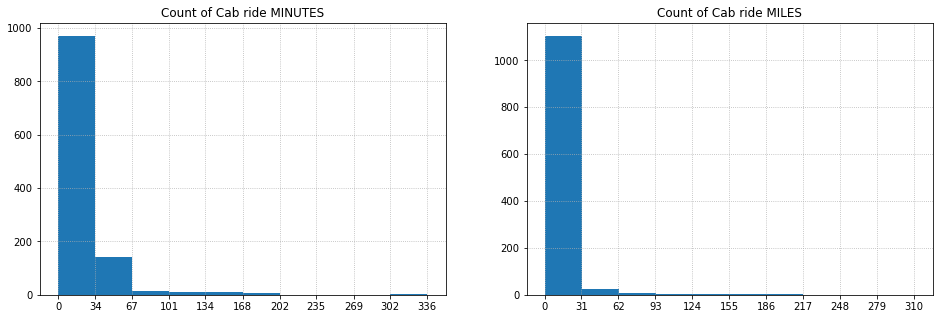

In [103]:
plt.figure(figsize = (16,5))

plt.subplot(1,2,1)
n, bins, patches = plt.hist(df.MINUTES)
plt.xticks(bins.round())
plt.grid(True, linestyle = "dotted")
plt.title("Count of Cab ride MINUTES")

plt.subplot(1,2,2)
n, bins, patches = plt.hist(df.MILES)
plt.xticks(bins.round())
plt.grid(True, linestyle = "dotted")
plt.title("Count of Cab ride MILES");

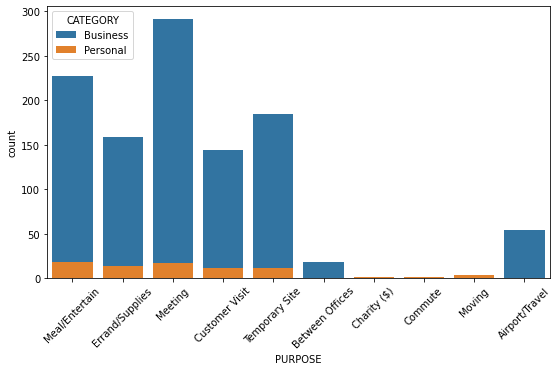

In [107]:
plt.figure(figsize = (9,5))
sns.countplot(data=df,x="PURPOSE", hue = 'CATEGORY', dodge = False)
plt.xticks(rotation = 45);

**The above plot makes clear distinction on the Purpose of Business rides and Personal rides.
This may give insight to cab aggregators to decide which sector to introduce new cabs in.**

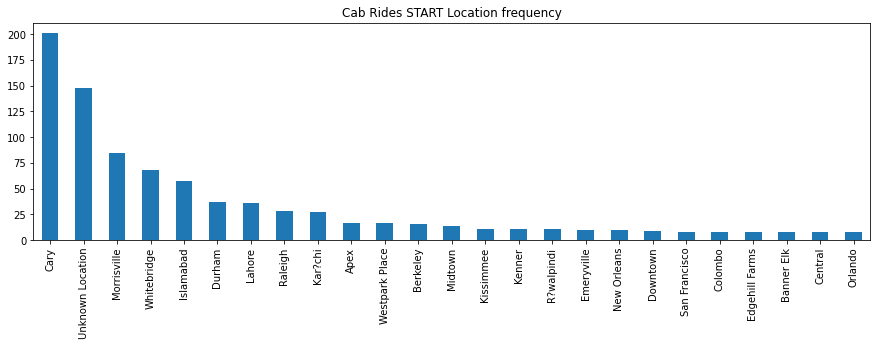

In [111]:
plt.figure(figsize = (15,4))
pd.Series(df['START']).value_counts()[:25].plot(kind="bar")
plt.title("Cab Rides START Location frequency")
plt.xticks(rotation = 90);

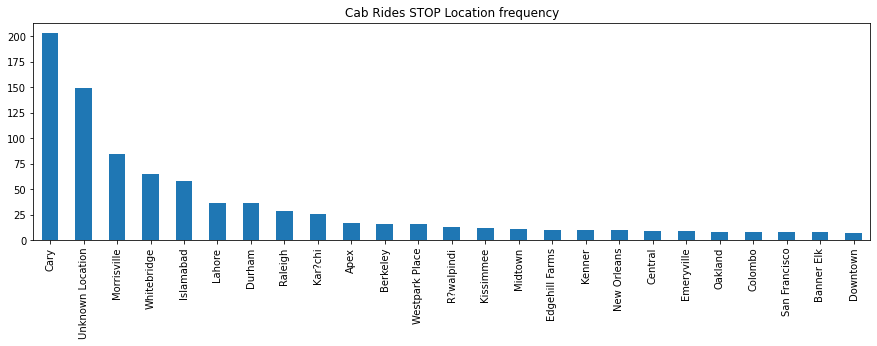

In [112]:
plt.figure(figsize=(15,4))
pd.Series(df['STOP']).value_counts()[:25].plot(kind = "bar")
plt.title("Cab Rides STOP Location frequency")
plt.xticks(rotation = 90);

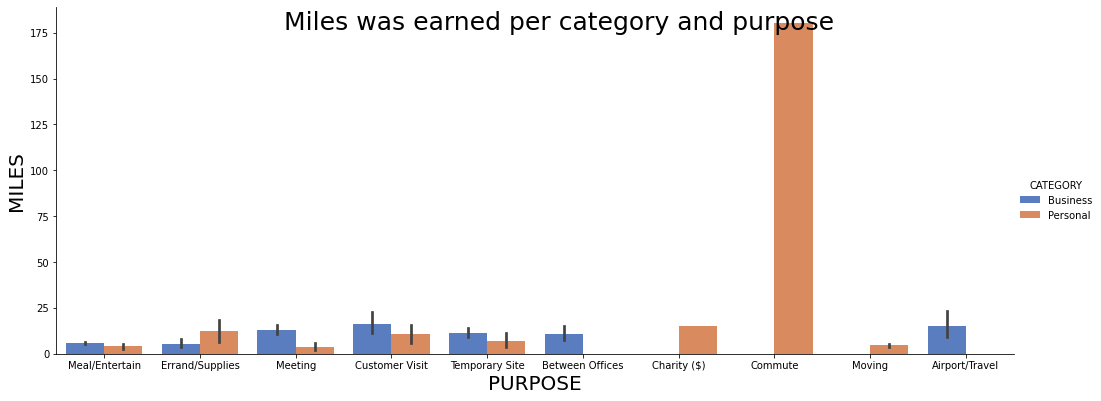

In [113]:
g = sns.factorplot(x="PURPOSE", y="MILES", hue="CATEGORY", data=df,
                   size=15, kind="bar", palette="muted")
#from the graph is clearly seen that the main contributors for miles are:
#in Business category: meetings and customer; private: commute and charity 
g.fig.suptitle('Miles was earned per category and purpose', fontsize= 25)
g.fig.set_size_inches(15, 5)
g.set_xlabels('PURPOSE', fontsize= 20)
g.set_ylabels('MILES', fontsize= 20)

# Conclusion

> - Most of the cab rides are within a distance of 31 miles taking about 34 minutes.
> - Business Cab rides are not only more in volume, but also in distance travelled.
> - Main uses of cab rides are Meal/Entertainment, Customer visit, Meeting, Errand/Supplies.
> - Cab traffic is mostly concentrated in 5 cities or localities.
> - Ac seasonal pattern of cab ride volume exists, which is highest on December.